In [2]:
import pandas as pd
import numpy as np

### We should use the columns in order so as to have low entropy (thus high information gain)

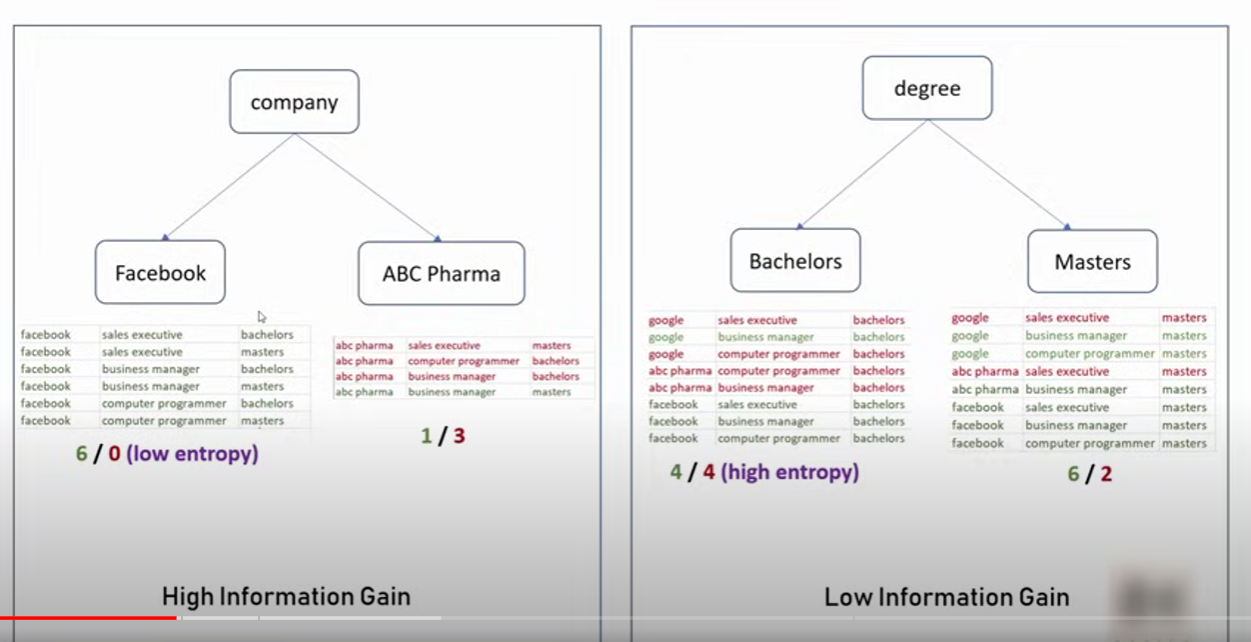

In [3]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [5]:
inputs = df.drop(['salary_more_then_100k'],axis=1)
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

## Here , we want to classify. Therefore we can easily use Label Encoding (ordinal encoding)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Creating label encoder for each column
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [10]:
inputs_n = inputs.drop(['company','job','degree'],axis=1)
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(inputs_n,target,test_size=0.2)

## Creating our Decision Tree Model

In [12]:
from sklearn import tree
myModel = tree.DecisionTreeClassifier()
# myModel = tree.DecisionTreeClassifier(max_depth = None , criterion='entropy')......

In [13]:
myModel.fit(X_train ,y_train)

DecisionTreeClassifier()

In [14]:
myModel.score(X_test,y_test)

0.75

In [15]:
from sklearn.metrics import classification_report
predicted_values = myModel.predict(X_test)
report = classification_report(y_test,predicted_values)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



### Making Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_values)

Text(50.722222222222214, 0.5, 'Truth')

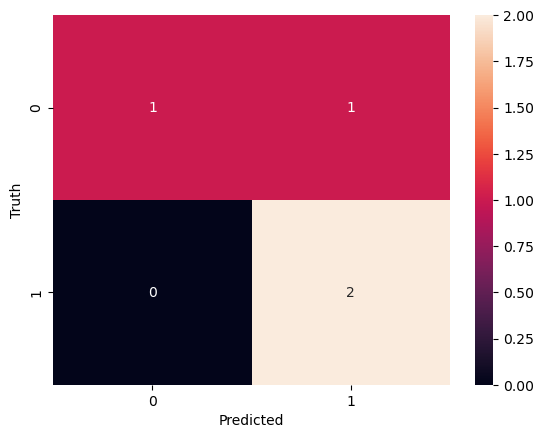

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Plotting my Tree-

[Text(0.3333333333333333, 0.9, 'job_n <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4444444444444444, 0.7, 'company_n <= 1.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2222222222222222, 0.5, 'company_n <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.5, 'degree_n <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.3, 'job_n <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

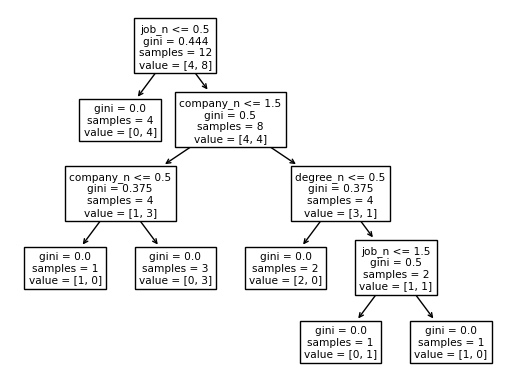

In [18]:
from sklearn.tree import plot_tree

plot_tree(myModel, max_depth=None, feature_names=list(X_train.columns))

# Analysing titanic dataset

In [19]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df = df[['Survived' , 'Pclass' ,'Sex', 'Age' , 'Fare' ]]
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


### Our dataframe contains NULL values which must be dropped

In [33]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


### Studying the relationship between survived and other classes

In [39]:
from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()

In [46]:
df['Sex_le'] = sex_le.fit_transform(df['Sex'])
df = df.drop(['Sex'],axis=1)
df
# 1-> male , 0-> female

,Survived,Pclass,Age,Fare,Sex_le
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
885,0,3,39.0,29.1250,0
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
889,1,1,26.0,30.0000,1


In [47]:
df.describe()

,Survived,Pclass,Age,Fare,Sex_le
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514,0.634454
std,0.491460,0.838250,14.526497,52.918930,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,8.050000,0.000000
50%,0.000000,2.000000,28.000000,15.741700,1.000000
75%,1.000000,3.000000,38.000000,33.375000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


In [49]:
df.groupby('Survived').mean()

,Pclass,Age,Fare,Sex_le
Survived,,,,
0,2.485849,30.626179,22.965456,0.849057
1,1.872414,28.343690,51.843205,0.320690


This shows that amongst the survivors , most were women and vice versa

In [50]:
  df.mean()

Survived     0.406162
Pclass       2.236695
Age         29.699118
Fare        34.694514
Sex_le       0.634454
dtype: float64

In [20]:
inputs = df[['Pclass' , 'Sex' , 'Age' , 'Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [24]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [21]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeClassifier
myModel = DecisionTreeClassifier()

In [ ]:
myModel.fit